In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [4]:
train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
numerical_columns=['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
categorical_columns=['Geography','Gender','HasCrCard','IsActiveMember','Exited']

In [6]:
train[numerical_columns].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,630.804875,42.988125,4.567375,100569.286116,1.534250,100103.554906
std,59.076984,7.515870,1.272758,31431.771836,0.582554,24511.460933
min,446.000000,28.000000,2.000000,62397.410000,1.000000,57522.070000
25%,590.000000,38.000000,4.000000,62397.410000,1.000000,79216.925000
50%,631.000000,42.000000,5.000000,111118.600000,1.000000,100056.110000
75%,672.000000,47.000000,6.000000,126500.100000,2.000000,121104.542500
max,753.000000,81.000000,7.000000,188500.680000,4.000000,142481.990000


# Data Visualization

<AxesSubplot:xlabel='Exited', ylabel='count'>

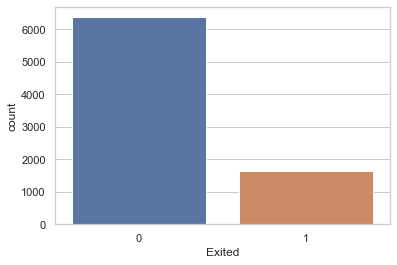

In [7]:
sns.countplot(train.Exited)

<AxesSubplot:xlabel='Gender', ylabel='count'>

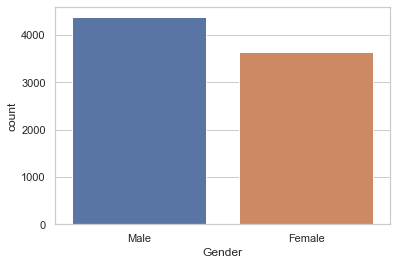

In [8]:
sns.countplot(train.Gender)

<AxesSubplot:xlabel='Age', ylabel='Density'>

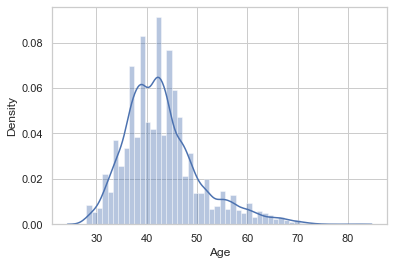

In [9]:
sns.distplot(train.Age)

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
df=train
df1=test

## Data Standarlization

In [12]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_balance'] = rob_scaler.fit_transform(df['Balance'].values.reshape(-1,1))
df['scaled_EstimatedSalary'] = rob_scaler.fit_transform(df['EstimatedSalary'].values.reshape(-1,1))

df1['scaled_balance'] = rob_scaler.fit_transform(df1['Balance'].values.reshape(-1,1))
df1['scaled_EstimatedSalary'] = rob_scaler.fit_transform(df1['EstimatedSalary'].values.reshape(-1,1))

df.drop(['Balance','EstimatedSalary'], axis=1, inplace=True)
df1.drop(['Balance','EstimatedSalary'], axis=1, inplace=True)

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,scaled_balance,scaled_EstimatedSalary
0,551,15806307,Trevisano,720,Spain,Male,38,5,2,0,1,0,0.045760,0.179556
1,6897,15709621,Martin,682,France,Female,54,4,1,1,0,1,-0.760049,0.311130
2,4588,15619340,Palmer,672,France,Female,31,5,1,1,1,0,0.137047,0.784696
3,291,15620746,Napolitani,592,Spain,Female,40,4,1,1,0,0,-0.107027,0.257862
4,1673,15646372,Yao,753,Spain,Male,42,5,1,0,1,0,0.144598,0.628407


## Setting Dummy Variable and Dropping Variables 

In [14]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df1['Gender'] = df1['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [15]:
df['Geography'].unique()
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df=df.drop('Surname',axis=1)
df=df.drop('RowNumber',axis=1)
df=df.drop('CustomerId',axis=1)
df1=df1.drop('Surname',axis=1)

In [17]:
df=pd.get_dummies(df,drop_first=False)
df1=pd.get_dummies(df1,drop_first=False)

In [18]:
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,scaled_balance,scaled_EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,720,1,38,5,2,0,1,0,0.045760,0.179556,0,0,1
1,682,0,54,4,1,1,0,1,-0.760049,0.311130,1,0,0
2,672,0,31,5,1,1,1,0,0.137047,0.784696,1,0,0
3,592,0,40,4,1,1,0,0,-0.107027,0.257862,0,0,1
4,753,1,42,5,1,0,1,0,0.144598,0.628407,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,568,0,35,6,2,1,1,1,0.155391,0.592881,1,0,0
7996,602,0,45,7,1,1,0,0,0.541747,-0.018623,0,1,0
7997,679,0,43,5,1,1,0,1,0.338385,0.733504,0,0,1
7998,715,1,38,4,1,0,0,0,0.118729,-0.109139,1,0,0


In [19]:
df['Geography_France']=df['Geography_France'].astype('int')
df['Geography_Germany']=df['Geography_Germany'].astype('int')
df['Geography_Spain']=df['Geography_Spain'].astype('int')

df1['Geography_France']=df1['Geography_France'].astype('int')
df1['Geography_Germany']=df1['Geography_Germany'].astype('int')
df1['Geography_Spain']=df1['Geography_Spain'].astype('int')

## Correlation

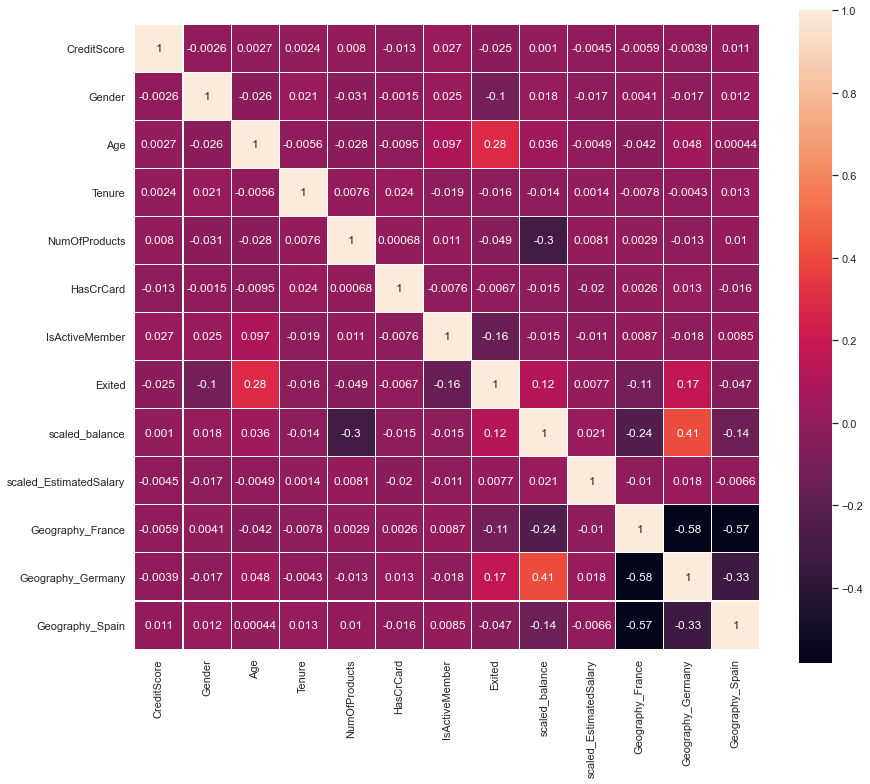

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Exited', axis=1)
y = df['Exited']

## Outlier Treatment

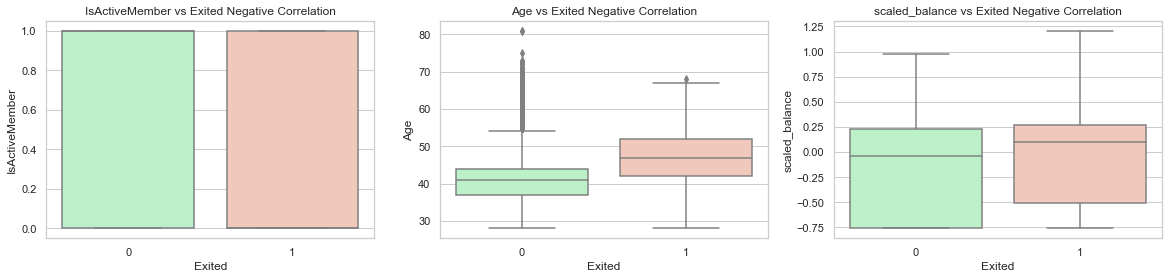

In [22]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
colors = ['#B3F9C5', '#f9c5b3']
##Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Exited", y="IsActiveMember", data=df, palette=colors, ax=axes[0])
axes[0].set_title('IsActiveMember vs Exited Negative Correlation')

sns.boxplot(x="Exited", y="Age", data=df, palette=colors, ax=axes[1])
axes[1].set_title('Age vs Exited Negative Correlation')


sns.boxplot(x="Exited", y="scaled_balance", data=df, palette=colors, ax=axes[2])
axes[2].set_title('scaled_balance vs Exited Negative Correlation')



plt.show()

In [23]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(df.Age)
df.drop(train[ (df.Age > upperbound) | (df.Age < lowerbound) ].index , inplace=True)

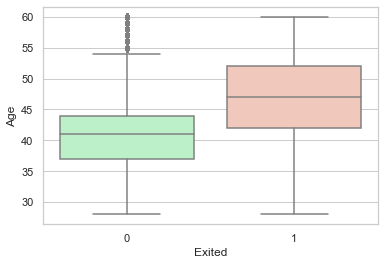

In [24]:

sns.boxplot(x="Exited", y="Age", data=df, palette=colors)
#axes[1].set_title('Age vs Exited Negative Correlation')
plt.show()

## Data Splitting and OverSampling

In [25]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [27]:
sm = SMOTE(sampling_strategy=0.3,random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

# Data Modelling

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 




## Random Forest

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1916
           1       0.78      0.47      0.59       484

    accuracy                           0.87      2400
   macro avg       0.83      0.72      0.75      2400
weighted avg       0.86      0.87      0.85      2400



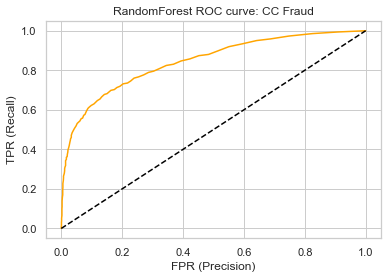

Area under curve (AUC):  0.8437904380682897


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

clf = RandomForestClassifier()
clf.fit(X_res,y_res)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('RandomForest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color='orange')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## XGBClassifier 

In [30]:
xgb_model=xgb.XGBClassifier(n_jobs = -1,n_estimators=150,learning_rate=0.01)

xgb_model.fit(X_res,y_res)


[22:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1916
           1       0.76      0.46      0.57       484

    accuracy                           0.86      2400
   macro avg       0.82      0.71      0.74      2400
weighted avg       0.85      0.86      0.85      2400



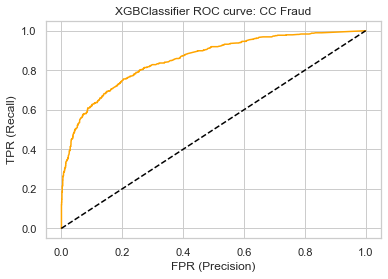

Area under curve (AUC):  0.8550343777497887


In [31]:
y_pred=xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

y_score = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('XGBClassifier ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color='orange')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

#row=df1["RowNumber"]
#preds=pd.DataFrame(y_pred)
#print(preds)

#result1=pd.concat([row,preds],axis=1,ignore_index = True)
#result1.to_csv("hw6_result1.csv")
#result1[1].value_counts()

## AdaBoost Classifier 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1916
           1       0.70      0.49      0.58       484

    accuracy                           0.86      2400
   macro avg       0.79      0.72      0.75      2400
weighted avg       0.84      0.86      0.85      2400



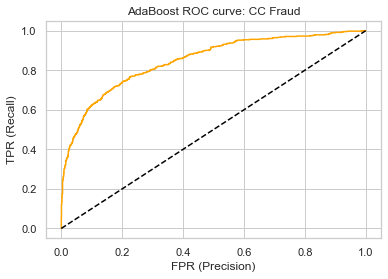

Area under curve (AUC):  0.8487325091875291


In [32]:
from sklearn.ensemble import AdaBoostClassifier
model_ABC = AdaBoostClassifier()
model_ABC.fit(X_res, y_res)
y_pred=model_ABC.predict(X_test)

print (classification_report(y_test, y_pred))
y_score = model_ABC.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('AdaBoost ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color='orange')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## LGBM 

In [33]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    tree_learner = 'serial',
    n_jobs = -1, force_col_wise= True, verbose=0, 
    n_estimators = 100, 
    num_leaves = 255, learning_rate = 0.1,
    subsample = 0.7,
    )

model.fit(X_res ,y_res)
y_pred = model.predict(X_test)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1916
           1       0.71      0.50      0.58       484

    accuracy                           0.86      2400
   macro avg       0.79      0.72      0.75      2400
weighted avg       0.85      0.86      0.85      2400



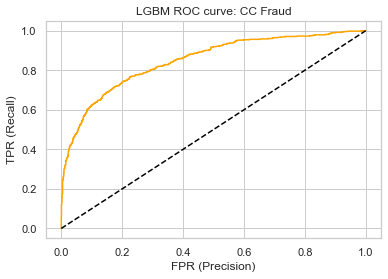

Area under curve (AUC):  0.8487325091875291


In [34]:
print (classification_report(y_test, y_pred))


y_score = model_ABC.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('LGBM ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color="orange")
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## CatBoost 

In [35]:
model_CBC = CatBoostClassifier()
model_CBC.fit(X_res,y_res)
y_pred=model_CBC.predict(X_test)

Learning rate set to 0.021802
0:	learn: 0.6766332	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6636175	total: 67.8ms	remaining: 33.8s
2:	learn: 0.6480247	total: 73.6ms	remaining: 24.5s
3:	learn: 0.6331718	total: 79.4ms	remaining: 19.8s
4:	learn: 0.6217011	total: 85.7ms	remaining: 17.1s
5:	learn: 0.6085431	total: 92ms	remaining: 15.2s
6:	learn: 0.5954796	total: 98.2ms	remaining: 13.9s
7:	learn: 0.5845025	total: 104ms	remaining: 12.9s
8:	learn: 0.5752763	total: 110ms	remaining: 12.1s
9:	learn: 0.5659849	total: 117ms	remaining: 11.5s
10:	learn: 0.5563381	total: 122ms	remaining: 10.9s
11:	learn: 0.5462121	total: 127ms	remaining: 10.4s
12:	learn: 0.5361619	total: 132ms	remaining: 10.1s
13:	learn: 0.5273728	total: 139ms	remaining: 9.8s
14:	learn: 0.5205852	total: 144ms	remaining: 9.46s
15:	learn: 0.5122654	total: 149ms	remaining: 9.16s
16:	learn: 0.5061440	total: 154ms	remaining: 8.9s
17:	learn: 0.5002481	total: 158ms	remaining: 8.59s
18:	learn: 0.4938301	total: 161ms	remaining: 8.3s
19:	learn

166:	learn: 0.3186480	total: 666ms	remaining: 3.32s
167:	learn: 0.3184087	total: 670ms	remaining: 3.32s
168:	learn: 0.3181188	total: 674ms	remaining: 3.31s
169:	learn: 0.3179759	total: 678ms	remaining: 3.31s
170:	learn: 0.3177277	total: 682ms	remaining: 3.3s
171:	learn: 0.3175125	total: 685ms	remaining: 3.29s
172:	learn: 0.3173247	total: 688ms	remaining: 3.29s
173:	learn: 0.3170668	total: 692ms	remaining: 3.28s
174:	learn: 0.3168764	total: 695ms	remaining: 3.27s
175:	learn: 0.3167211	total: 698ms	remaining: 3.27s
176:	learn: 0.3165704	total: 702ms	remaining: 3.26s
177:	learn: 0.3163839	total: 705ms	remaining: 3.25s
178:	learn: 0.3162118	total: 709ms	remaining: 3.25s
179:	learn: 0.3158649	total: 713ms	remaining: 3.25s
180:	learn: 0.3156956	total: 717ms	remaining: 3.24s
181:	learn: 0.3155135	total: 720ms	remaining: 3.23s
182:	learn: 0.3152050	total: 724ms	remaining: 3.23s
183:	learn: 0.3149801	total: 728ms	remaining: 3.23s
184:	learn: 0.3147735	total: 731ms	remaining: 3.22s
185:	learn: 0

364:	learn: 0.2859797	total: 1.37s	remaining: 2.39s
365:	learn: 0.2857723	total: 1.38s	remaining: 2.38s
366:	learn: 0.2856233	total: 1.38s	remaining: 2.38s
367:	learn: 0.2855213	total: 1.38s	remaining: 2.38s
368:	learn: 0.2853948	total: 1.39s	remaining: 2.37s
369:	learn: 0.2852122	total: 1.39s	remaining: 2.37s
370:	learn: 0.2851041	total: 1.39s	remaining: 2.36s
371:	learn: 0.2849841	total: 1.4s	remaining: 2.36s
372:	learn: 0.2848426	total: 1.4s	remaining: 2.35s
373:	learn: 0.2847342	total: 1.4s	remaining: 2.35s
374:	learn: 0.2846221	total: 1.41s	remaining: 2.35s
375:	learn: 0.2844947	total: 1.41s	remaining: 2.34s
376:	learn: 0.2843606	total: 1.41s	remaining: 2.34s
377:	learn: 0.2842475	total: 1.42s	remaining: 2.33s
378:	learn: 0.2841622	total: 1.42s	remaining: 2.33s
379:	learn: 0.2840773	total: 1.42s	remaining: 2.32s
380:	learn: 0.2839626	total: 1.43s	remaining: 2.32s
381:	learn: 0.2837700	total: 1.43s	remaining: 2.32s
382:	learn: 0.2837048	total: 1.44s	remaining: 2.31s
383:	learn: 0.2

526:	learn: 0.2668422	total: 1.95s	remaining: 1.75s
527:	learn: 0.2667388	total: 1.95s	remaining: 1.75s
528:	learn: 0.2666143	total: 1.96s	remaining: 1.74s
529:	learn: 0.2664857	total: 1.96s	remaining: 1.74s
530:	learn: 0.2662880	total: 1.96s	remaining: 1.74s
531:	learn: 0.2661812	total: 1.97s	remaining: 1.73s
532:	learn: 0.2660774	total: 1.97s	remaining: 1.73s
533:	learn: 0.2659431	total: 1.98s	remaining: 1.72s
534:	learn: 0.2658202	total: 1.98s	remaining: 1.72s
535:	learn: 0.2656875	total: 1.99s	remaining: 1.72s
536:	learn: 0.2655754	total: 1.99s	remaining: 1.72s
537:	learn: 0.2654555	total: 1.99s	remaining: 1.71s
538:	learn: 0.2653042	total: 2s	remaining: 1.71s
539:	learn: 0.2651417	total: 2s	remaining: 1.71s
540:	learn: 0.2649960	total: 2.01s	remaining: 1.7s
541:	learn: 0.2648290	total: 2.01s	remaining: 1.7s
542:	learn: 0.2646956	total: 2.02s	remaining: 1.7s
543:	learn: 0.2646240	total: 2.02s	remaining: 1.69s
544:	learn: 0.2645318	total: 2.02s	remaining: 1.69s
545:	learn: 0.2644594

706:	learn: 0.2470893	total: 2.6s	remaining: 1.08s
707:	learn: 0.2470079	total: 2.61s	remaining: 1.07s
708:	learn: 0.2469393	total: 2.61s	remaining: 1.07s
709:	learn: 0.2468673	total: 2.61s	remaining: 1.07s
710:	learn: 0.2467714	total: 2.62s	remaining: 1.06s
711:	learn: 0.2466680	total: 2.62s	remaining: 1.06s
712:	learn: 0.2465950	total: 2.63s	remaining: 1.06s
713:	learn: 0.2464443	total: 2.63s	remaining: 1.05s
714:	learn: 0.2463137	total: 2.63s	remaining: 1.05s
715:	learn: 0.2462287	total: 2.64s	remaining: 1.04s
716:	learn: 0.2461174	total: 2.64s	remaining: 1.04s
717:	learn: 0.2459851	total: 2.64s	remaining: 1.04s
718:	learn: 0.2458593	total: 2.65s	remaining: 1.03s
719:	learn: 0.2457370	total: 2.65s	remaining: 1.03s
720:	learn: 0.2456704	total: 2.65s	remaining: 1.03s
721:	learn: 0.2455782	total: 2.66s	remaining: 1.02s
722:	learn: 0.2454734	total: 2.66s	remaining: 1.02s
723:	learn: 0.2453440	total: 2.66s	remaining: 1.01s
724:	learn: 0.2452839	total: 2.67s	remaining: 1.01s
725:	learn: 0

874:	learn: 0.2312794	total: 3.18s	remaining: 454ms
875:	learn: 0.2312034	total: 3.18s	remaining: 450ms
876:	learn: 0.2311071	total: 3.18s	remaining: 447ms
877:	learn: 0.2310207	total: 3.19s	remaining: 443ms
878:	learn: 0.2309687	total: 3.19s	remaining: 439ms
879:	learn: 0.2308920	total: 3.19s	remaining: 436ms
880:	learn: 0.2308306	total: 3.2s	remaining: 432ms
881:	learn: 0.2307678	total: 3.2s	remaining: 428ms
882:	learn: 0.2306747	total: 3.2s	remaining: 424ms
883:	learn: 0.2306016	total: 3.21s	remaining: 421ms
884:	learn: 0.2304787	total: 3.21s	remaining: 417ms
885:	learn: 0.2304055	total: 3.21s	remaining: 413ms
886:	learn: 0.2303154	total: 3.22s	remaining: 410ms
887:	learn: 0.2302313	total: 3.22s	remaining: 406ms
888:	learn: 0.2301977	total: 3.22s	remaining: 402ms
889:	learn: 0.2300732	total: 3.23s	remaining: 399ms
890:	learn: 0.2299821	total: 3.23s	remaining: 395ms
891:	learn: 0.2298476	total: 3.23s	remaining: 391ms
892:	learn: 0.2297623	total: 3.24s	remaining: 388ms
893:	learn: 0.2

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1916
           1       0.75      0.50      0.60       484

    accuracy                           0.86      2400
   macro avg       0.82      0.73      0.76      2400
weighted avg       0.86      0.86      0.85      2400



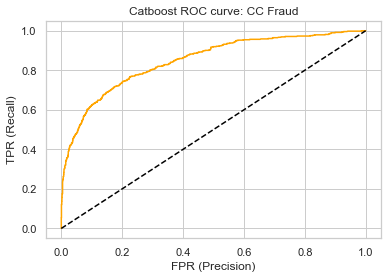

Area under curve (AUC):  0.8487325091875291


In [36]:
print (classification_report(y_test, y_pred))

y_score = model_ABC.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Catboost ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color='orange')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## Logistic Regression 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1916
           1       0.57      0.25      0.34       484

    accuracy                           0.81      2400
   macro avg       0.70      0.60      0.62      2400
weighted avg       0.78      0.81      0.78      2400



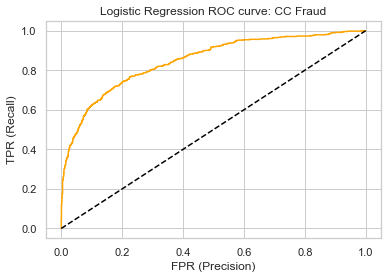

Area under curve (AUC):  0.8487325091875291


In [37]:
lr=LogisticRegression(random_state = 0,n_jobs = -1)
clf_l = lr.fit(X_res,y_res)
y_pred = clf_l.predict(X_test)

print (classification_report(y_test, y_pred))

y_score = model_ABC.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Logistic Regression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color='orange')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))